# Resampling refers to the process of changing the frequency of a time series.

# Resampling

In [ ]:
dates = pd.date_range('2020-01-01', '2020-12-31', freq='D')
rng = pd.date_range('2022-01-01', periods=100, freq='D')

# Upsampling and Downsampling

In time series analysis, upsampling and downsampling are techniques used to change the frequency of a time series. Here's what each of these techniques means:

**Upsampling** involves **increasing the frequency**  of a time series by **adding more data points.**  For example, you might upsample a daily time series to an hourly time series by inserting data points between each pair of consecutive days. When you upsample a time series, you need to decide how to fill in the additional data points. You might use interpolation to estimate the values of the new data points based on the existing data points, or you might use some other method.

**Downsampling** involves **decreasing the frequency**  of a time series by **reducing the number of data points.**  For example, you might downsample a daily time series to a weekly time series by taking the average of the data points in each week. When you downsample a time series, you need to decide how to aggregate the existing data points to create the new data points. You might take the mean, the maximum, the minimum, or some other aggregation function.

In [1]:
import pandas as pd

# create a DataFrame with daily data
dates = pd.date_range('2020-01-01', '2020-12-31', freq='D')
data = pd.Series(range(len(dates)), index=dates)
df = pd.DataFrame({'data': data})

# resample to monthly data
monthly_data = df.resample('M').sum()


In [2]:
monthly_data


,data
2020-01-31,465
2020-02-29,1305
2020-03-31,2325
2020-04-30,3165
2020-05-31,4216
2020-06-30,4995
2020-07-31,6107
2020-08-31,7068
2020-09-30,7755
2020-10-31,8959


In [3]:
rng = pd.date_range('2022-01-01', periods=100, freq='D')
ts = pd.Series(range(len(rng)), index=rng)

In [4]:
ts

2022-01-01     0
2022-01-02     1
2022-01-03     2
2022-01-04     3
2022-01-05     4
              ..
2022-04-06    95
2022-04-07    96
2022-04-08    97
2022-04-09    98
2022-04-10    99
Freq: D, Length: 100, dtype: int64

In [7]:
ts.resample("M").mean()

2022-01-31    15.0
2022-02-28    44.5
2022-03-31    74.0
2022-04-30    94.5
Freq: M, dtype: float64

In [8]:
# resample to monthly data and calculate the mean and maximum values within each month
ts.resample("M").agg(['min','max'])


,min,max
2022-01-31,0,30
2022-02-28,31,58
2022-03-31,59,89
2022-04-30,90,99


In [11]:
ts.resample('M', kind='timestamp').mean()

2022-01-31    15.0
2022-02-28    44.5
2022-03-31    74.0
2022-04-30    94.5
Freq: M, dtype: float64

In [10]:
ts.resample('M').mean()

2022-01-31    15.0
2022-02-28    44.5
2022-03-31    74.0
2022-04-30    94.5
Freq: M, dtype: float64

# parameter

In [14]:
import pandas as pd

# Create a DataFrame with date range
data = pd.DataFrame({'value': range(20)},
                    index=pd.date_range(start='2022-01-01', periods=20, freq='D'))



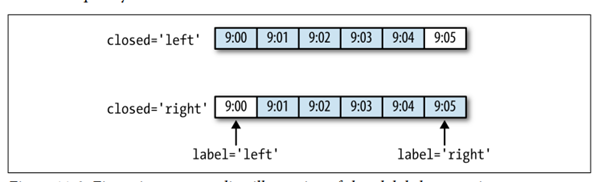

In [18]:
data.resample('2D').sum()

,value
2022-01-01,1
2022-01-03,5
2022-01-05,9
2022-01-07,13
2022-01-09,17
2022-01-11,21
2022-01-13,25
2022-01-15,29
2022-01-17,33
2022-01-19,37


In [17]:
data.resample('2D',closed='right').sum()

,value
2021-12-30,0
2022-01-01,3
2022-01-03,7
2022-01-05,11
2022-01-07,15
2022-01-09,19
2022-01-11,23
2022-01-13,27
2022-01-15,31
2022-01-17,35


In [19]:
data.resample('2D',closed='left').sum()

,value
2022-01-01,1
2022-01-03,5
2022-01-05,9
2022-01-07,13
2022-01-09,17
2022-01-11,21
2022-01-13,25
2022-01-15,29
2022-01-17,33
2022-01-19,37


In [20]:
data.resample('2D').sum()

,value
2022-01-01,1
2022-01-03,5
2022-01-05,9
2022-01-07,13
2022-01-09,17
2022-01-11,21
2022-01-13,25
2022-01-15,29
2022-01-17,33
2022-01-19,37


In [23]:
data.resample('2D',label='left').sum()

,value
2022-01-01,1
2022-01-03,5
2022-01-05,9
2022-01-07,13
2022-01-09,17
2022-01-11,21
2022-01-13,25
2022-01-15,29
2022-01-17,33
2022-01-19,37


In [27]:
data.resample('2D',loffset='-1D').sum()

C:\Users\SURUTHI S\AppData\Local\Temp\ipykernel_22264\735197261.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  data.resample('2D',loffset='-1D').sum()


,value
2021-12-31,1
2022-01-02,5
2022-01-04,9
2022-01-06,13
2022-01-08,17
2022-01-10,21
2022-01-12,25
2022-01-14,29
2022-01-16,33
2022-01-18,37


In [28]:
data.resample('2D',loffset='+1D').sum()

C:\Users\SURUTHI S\AppData\Local\Temp\ipykernel_22264\4161842837.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  data.resample('2D',loffset='+1D').sum()


,value
2022-01-02,1
2022-01-04,5
2022-01-06,9
2022-01-08,13
2022-01-10,17
2022-01-12,21
2022-01-14,25
2022-01-16,29
2022-01-18,33
2022-01-20,37


# Open-High-Low-Close (OHLC) resampling


In [29]:
data.resample('2D').ohlc()

value               
            open high low close
2022-01-01     0    1   0     1
2022-01-03     2    3   2     3
2022-01-05     4    5   4     5
2022-01-07     6    7   6     7
2022-01-09     8    9   8     9
2022-01-11    10   11  10    11
2022-01-13    12   13  12    13
2022-01-15    14   15  14    15
2022-01-17    16   17  16    17
2022-01-19    18   19  18    19

# Upsampling and Interpolation

In [31]:
import numpy as np

In [62]:
frame = pd.DataFrame(np.random.randn(2, 4),
 .....: index=pd.date_range('1/1/2000', periods=2,
 .....: freq='W-WED'),
 .....: columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [63]:
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.303434,0.149547,0.398464,2.170889
2000-01-12,1.910836,-1.392201,-1.928122,1.514458


In [64]:
frame.resample('D').asfreq()


,Colorado,Texas,New York,Ohio
2000-01-05,0.303434,0.149547,0.398464,2.170889
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.910836,-1.392201,-1.928122,1.514458


In [65]:
frame.resample("D").ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.303434,0.149547,0.398464,2.170889
2000-01-06,0.303434,0.149547,0.398464,2.170889
2000-01-07,0.303434,0.149547,0.398464,2.170889
2000-01-08,0.303434,0.149547,0.398464,2.170889
2000-01-09,0.303434,0.149547,0.398464,2.170889
2000-01-10,0.303434,0.149547,0.398464,2.170889
2000-01-11,0.303434,0.149547,0.398464,2.170889
2000-01-12,1.910836,-1.392201,-1.928122,1.514458


In [66]:
frame.resample("D").ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,0.303434,0.149547,0.398464,2.170889
2000-01-06,0.303434,0.149547,0.398464,2.170889
2000-01-07,0.303434,0.149547,0.398464,2.170889
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.910836,-1.392201,-1.928122,1.514458


In [67]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,0.303434,0.149547,0.398464,2.170889
2000-01-13,1.910836,-1.392201,-1.928122,1.514458


# Resampling with Periods

In [70]:
frame = pd.DataFrame(np.random.randn(24, 4),
 .....: index=pd.period_range('1-2020', '12-2021',
 .....: freq='M'),
 .....: columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [71]:
frame

,Colorado,Texas,New York,Ohio
2020-01,1.178912,-0.680609,0.600615,-0.753447
2020-02,0.013336,0.765500,-1.100618,-0.499881
2020-03,1.363809,-0.969126,-0.526950,-1.057832
2020-04,-0.813603,-0.340572,1.444211,-1.708270
2020-05,0.644140,-0.536125,0.360667,0.400324
2020-06,-0.745735,-2.040523,0.410610,-1.074719
2020-07,-2.971555,0.427856,-1.176291,-0.996526
2020-08,-0.213659,0.082529,2.325546,1.000988
2020-09,0.315991,1.475490,-2.091484,-1.205920
2020-10,-0.623950,0.314548,-0.768632,0.445423


In [75]:
frame.resample('A-DEC').sum()

,Colorado,Texas,New York,Ohio
2020,-5.389630,-2.765047,-1.814067,-6.645772
2021,5.459864,-1.307952,-1.793756,4.005392


In [78]:
frame.resample("Q-DEC").sum()

,Colorado,Texas,New York,Ohio
2020Q1,2.556057,-0.884236,-1.026953,-2.311160
2020Q2,-0.915197,-2.917220,2.215488,-2.382664
2020Q3,-2.869223,1.985876,-0.942230,-1.201458
2020Q4,-4.161267,-0.949467,-2.060372,-0.750489
2021Q1,2.577019,-0.971421,-3.523810,2.485129
2021Q2,2.897170,-1.928562,0.233222,1.960870
2021Q3,-1.364053,0.749123,1.523302,-0.634795
2021Q4,1.349728,0.842908,-0.026470,0.194187


In [80]:
frame.resample('Q-DEC', convention='end').sum()

,Colorado,Texas,New York,Ohio
2020Q1,2.556057,-0.884236,-1.026953,-2.311160
2020Q2,-0.915197,-2.917220,2.215488,-2.382664
2020Q3,-2.869223,1.985876,-0.942230,-1.201458
2020Q4,-4.161267,-0.949467,-2.060372,-0.750489
2021Q1,2.577019,-0.971421,-3.523810,2.485129
2021Q2,2.897170,-1.928562,0.233222,1.960870
2021Q3,-1.364053,0.749123,1.523302,-0.634795
2021Q4,1.349728,0.842908,-0.026470,0.194187


In [82]:
frame.resample('Q-DEC', convention='start').sum()

,Colorado,Texas,New York,Ohio
2020Q1,2.556057,-0.884236,-1.026953,-2.311160
2020Q2,-0.915197,-2.917220,2.215488,-2.382664
2020Q3,-2.869223,1.985876,-0.942230,-1.201458
2020Q4,-4.161267,-0.949467,-2.060372,-0.750489
2021Q1,2.577019,-0.971421,-3.523810,2.485129
2021Q2,2.897170,-1.928562,0.233222,1.960870
2021Q3,-1.364053,0.749123,1.523302,-0.634795
2021Q4,1.349728,0.842908,-0.026470,0.194187
